In [2]:
!pip install -U finance-datareader

In [3]:
import pandas as pd
import numpy as np



In [6]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.33'

In [7]:
df_kospi = fdr.StockListing("KOSPI")

In [8]:
len(df_kospi)

5645

In [9]:
df_kospi.head(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN
10,395750,KOSPI,ARIRANG ESG가치주액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
11,395760,KOSPI,ARIRANG ESG성장주액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
12,278420,KOSPI,ARIRANG ESG우수기업,NaN,NaN,NaT,NaN,NaN,NaN,NaN
13,429740,KOSPI,ARIRANG Fn K리츠,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [10]:
import csv

In [11]:
import os

path = '/home/harnadal/Desktop/Machine_learning/kospi_price'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if
                file.endswith('.csv')]

In [12]:
print(file_list)

['000060.csv', '000320.csv', '304780.csv', '298770.csv', '143460.csv', '013870.csv', '139270.csv', '277630.csv', '71901B92.csv', '002390.csv', '353200.csv', '006650.csv', '570066.csv', '093230.csv', '006660.csv', '270800.csv', '304670.csv', '322130.csv', '009290.csv', '035150.csv', '005300.csv', '008500.csv', '580031.csv', '294400.csv', '395280.csv', '138040.csv', '012690.csv', '315960.csv', '412570.csv', '72502BA2.csv', '373220.csv', '090430.csv', '510021.csv', '166400.csv', '570019.csv', '220130.csv', '071950.csv', '299080.csv', '217790.csv', '069660.csv', '003060.csv', '003000.csv', '176950.csv', '421320.csv', '007980.csv', '265690.csv', '74701776.csv', '272560.csv', '001070.csv', '426330.csv', '316140.csv', '031430.csv', '033180.csv', '003670.csv', '004450.csv', '069640.csv', '200030.csv', '005945.csv', '301400.csv', '180640.csv', '091810.csv', '010145.csv', '002150.csv', '395270.csv', '377990.csv', '001525.csv', '008700.csv', '032640.csv', '570060.csv', '580036.csv', '001290.csv',

In [13]:
folder = "kospi_price"
if not os.path.isdir(folder):
    os.mkdir(folder)

In [ ]:
'''
    Kospi data csv create code
'''



# for ix, row in df_kospi.iterrows():
#     sym, name = row['Symbol'], row['Name']
#     csv_fn = os.path.join(folder, f'{sym}.csv')
#     if os.path.exists(csv_fn):
#         print('skip', csv_fn)
#         continue

#     try:
#       print(csv_fn, end=' ')
#       df = fdr.DataReader(sym, '2021-01-01', '2022-06-10')
#       df['Symbol'] = sym
#       print(len(df), 'rows')
#       df.to_csv(csv_fn, quoting=csv.QUOTE_MINIMAL)
#     except ValueError as e:
#       print(e)
#     except IndexError as e:
#       print(e)

In [15]:
# df_csv = pd.DataFrame()
# for i in file_list_py:
#     data = pd.read_csv(path+i)
#     df_csv = pd.concat([df,data])

# df_csv = df_csv.reset_index(drop = True)

In [16]:
# sym = '000020'
# csv_fn = os.path.join(folder, f'{sym}.csv')
# mmm = pd.read_csv(csv_fn, parse_dates=True, index_col='Date')

# mmm.head()
# mmm.truncate(before='2022-05-02',axis=0)

In [17]:
# mmm.tail()

In [18]:
# df_plot = pd.DataFrame(mmm={x='High', y='Low'})
# df2 = df_plot.loc[:['High','Low']]
# # df_plot['000020'] = 000020['Close']

# # df_plot = df_plot / df_plot.iloc[0] - 1.0
# # df_plot.plot()

# df2.plot()
# plt.show()

# df_test2 = df_test[['Close']]

# df_test2.truncate(before='2022-05-02',axis=0).plot()
# plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [20]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [21]:
WINDOW_SIZE=20
BATCH_SIZE=4

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Lambda
from keras.losses import Huber
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

2022-06-15 03:39:06.885347: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 03:39:06.984326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 03:39:06.984569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-15 03:39:06.985595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [23]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [32]:
# earlystopping은 10번 epoch동동안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             metrics=['accuracy'],
                             verbose=1)

In [25]:
accuracy_arr = np.array([])
num = len(file_list)

In [46]:
for i in range(0, (num - 1)):
    
    csv_test = os.path.join(folder, file_list[i])
    df_test = pd.read_csv(csv_test, parse_dates=True, index_col='Date')
    
    scaler = MinMaxScaler()
    # 스케일을 적용할 column을 정의합니다.
    scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    # 스케일 후 columns
    scaled = scaler.fit_transform(df_test[scale_cols])

    df_pd = pd.DataFrame(scaled, columns=scale_cols)
    
    x_train, x_test, y_train, y_test = train_test_split(df_pd.drop('Close', 1), df_pd['Close'], test_size=0.2, random_state=0, shuffle=False)
    
    # trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
    train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
    test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)
    
    # model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    hist = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=100, 
                    callbacks=[checkpoint, earlystopping])
    # hist.history['acc']
    loss, acc = model.evaluate(x_test, test_data)
    print(f'loss={loss}')
    print(f'acc={acc}')
    # loss_and_metrics = model.evaluate(x = x_train, y = y_train, axis = 1)
    accuracy_arr = np.append([file_list[i], acc])

Epoch 1/100
     29/Unknown - 0s 4ms/step - loss: 4.1044e-04 - accuracy: 0.0086    

/tmp/ipykernel_4461/853924509.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df_pd.drop('Close', 1), df_pd['Close'], test_size=0.2, random_state=0, shuffle=False)


     61/Unknown - 0s 3ms/step - loss: 4.7518e-04 - accuracy: 0.0041
Epoch 1: val_loss did not improve from 0.00045
66/66 [==============================] - 0s 4ms/step - loss: 4.6329e-04 - accuracy: 0.0038 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 2/100
55/66 [========================>.....] - ETA: 0s - loss: 4.3879e-04 - accuracy: 0.0045    
Epoch 2: val_loss did not improve from 0.00045
66/66 [==============================] - 0s 4ms/step - loss: 4.2564e-04 - accuracy: 0.0038 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 3/100
62/66 [===========================>..] - ETA: 0s - loss: 4.2838e-04 - accuracy: 0.0040
Epoch 3: val_loss did not improve from 0.00045
66/66 [==============================] - 0s 4ms/step - loss: 4.2280e-04 - accuracy: 0.0038 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 4/100
54/66 [=======================>......] - ETA: 0s - loss: 4.0753e-04 - accuracy: 0.0046    
Epoch 4: val_loss did not improve from 0.00045
66/66 [=====================

ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

13/13 [==============================] - 0s 2ms/step


In [ ]:
pred.shape

(51, 1)

## 예측 데이터 시각화

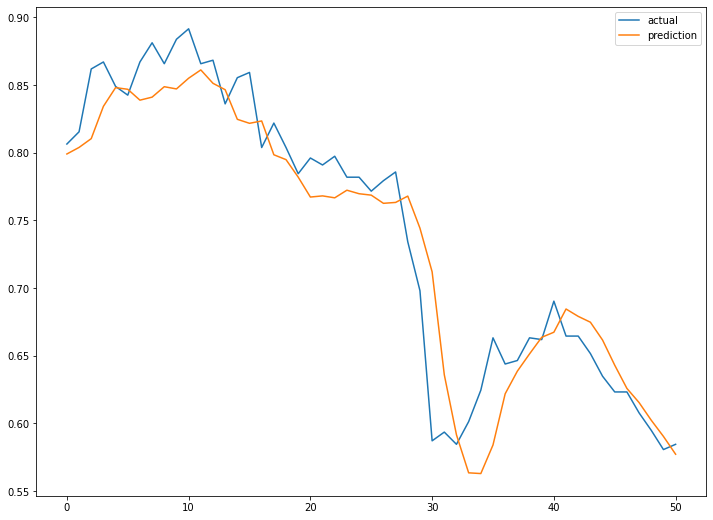

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()